<a href="https://colab.research.google.com/github/ankit-genzeon/AI-ML-Bootcamp-Genzeon-2023/blob/master/case_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
dataset = '/content/drive/MyDrive/Colab Notebooks/SUV_Purchase.csv'
data = pd.read_csv(dataset)

In [3]:
data.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


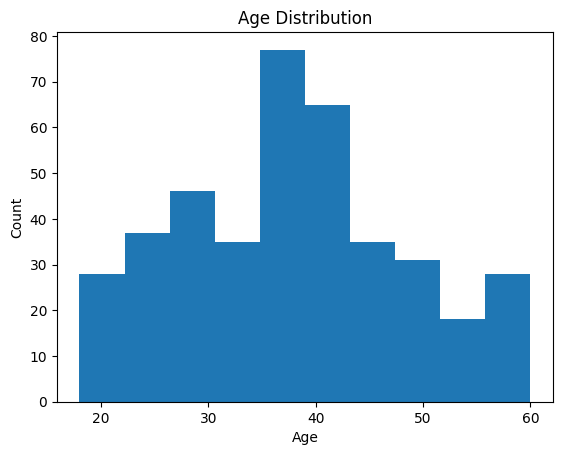

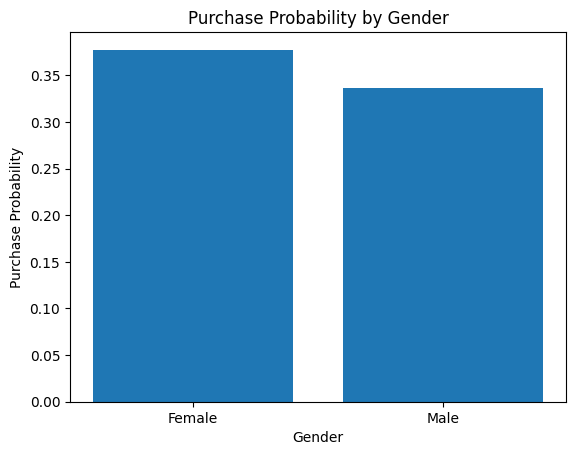

In [4]:
import matplotlib.pyplot as plt

# Visualize the distribution of age
plt.hist(data['Age'])
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Age Distribution')
plt.show()

# Visualize the purchase status by gender
purchase_by_gender = data.groupby('Gender')['Purchased'].mean()
plt.bar(purchase_by_gender.index, purchase_by_gender)
plt.xlabel('Gender')
plt.ylabel('Purchase Probability')
plt.title('Purchase Probability by Gender')
plt.show()


In [5]:
data.columns


Index(['User ID', 'Gender', 'Age', 'EstimatedSalary', 'Purchased'], dtype='object')

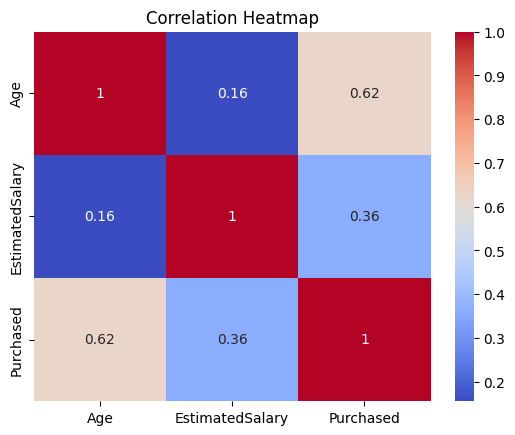

In [6]:
import seaborn as sns

# Select the columns with numerical data
numeric_columns = ['Age', 'EstimatedSalary', 'Purchased']

# Calculate the correlation matrix
correlation_matrix = data[numeric_columns].corr()

# Create the heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


In [ ]:
sns.plotting_context('notebook')
sns.pairplot(data, hue='Gender', palette = 'tab20')

In [ ]:
'''Before splitting the data and training a model, it's often necessary to preprocess the data.
This may include handling missing values, encoding categorical variables, or scaling numerical features.
The specific preprocessing steps depend on your dataset and the machine learning algorithm you plan to use.'''

In [8]:
# #preprocessing the data

# from sklearn.model_selection import train_test_split
# from sklearn.preprocessing import LabelEncoder

# # Drop rows with missing values
# data = data.dropna()

# # Encode categorical variables
# label_encoder = LabelEncoder()
# data['Gender'] = label_encoder.fit_transform(data['Gender'])

# # Split the data into train and test sets
# X = data.drop('Purchased', axis=1)
# y = data['Purchased']
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)


In [ ]:
data

In [ ]:
import seaborn as sns

# Select the columns with numerical data
numeric_columns = ['Age', 'Gender', 'EstimatedSalary', 'Purchased']

# Calculate the correlation matrix
correlation_matrix = data[numeric_columns].corr()

# Create the heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


      User ID  Gender  Age  EstimatedSalary  Purchased
0    15624510       1   19            19000          0
1    15810944       1   35            20000          0
2    15668575       0   26            43000          0
3    15603246       0   27            57000          0
4    15804002       1   19            76000          0
..        ...     ...  ...              ...        ...
395  15691863       0   46            41000          1
396  15706071       1   51            23000          1
397  15654296       0   50            20000          1
398  15755018       1   36            33000          0
399  15594041       0   49            36000          1

[400 rows x 5 columns]
_________________________________
Model accuracy: 0.8875
-------------------Scaling on X and y---------getting error
_________________________________
Overall Model accuracy: 0.3575


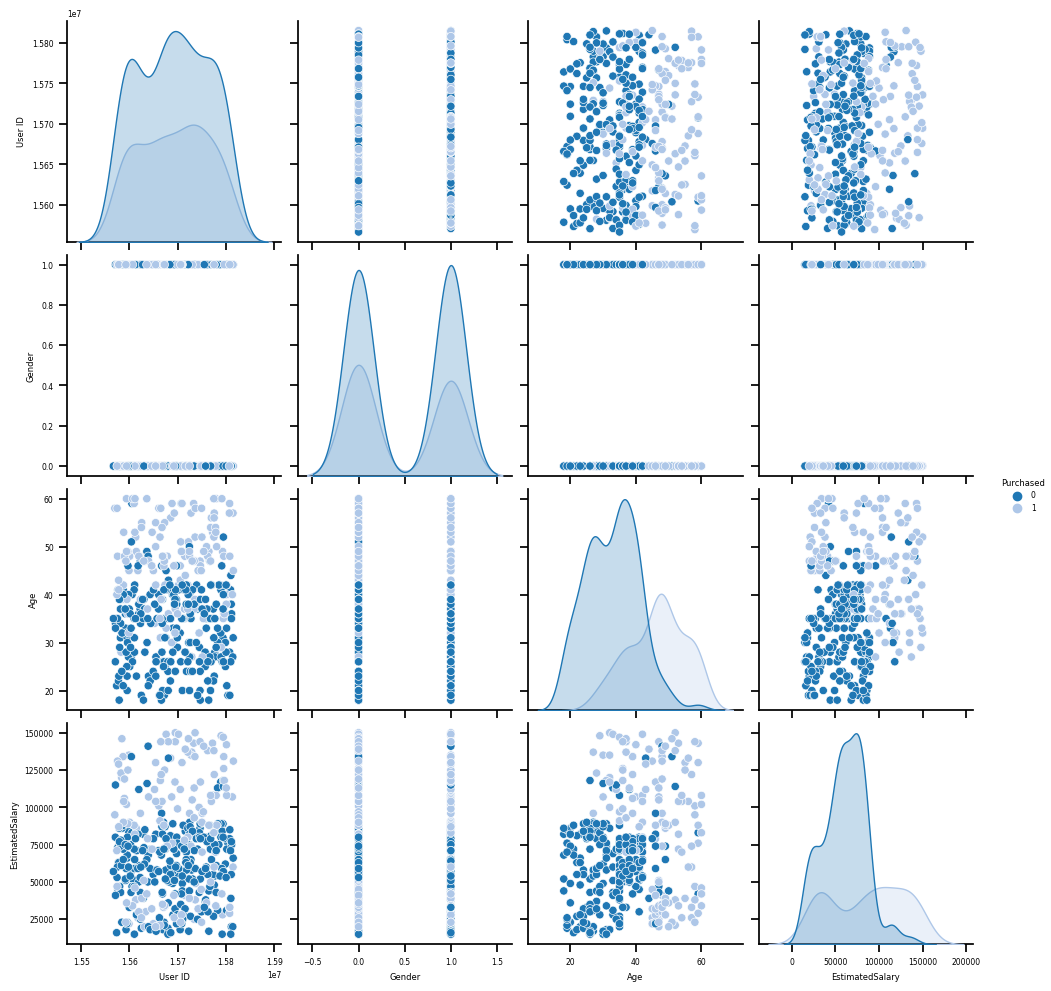

In [30]:
import pandas as pd

import seaborn as sns

from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler

from sklearn.preprocessing import LabelEncoder

X = data.iloc[:, 1:-1]

y = data.iloc[:, -1]

gender=data['Gender']




label_encoder = LabelEncoder()

data['Gender'] = label_encoder.fit_transform(gender)

print(data)




with sns.plotting_context("notebook",font_scale=0.5):

  sns.pairplot(data[['User ID', 'Gender', 'Age', 'EstimatedSalary', 'Purchased']] , hue='Purchased' , palette='tab20')


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)

X_test = scaler.transform(X_test)


model = LogisticRegression()

model.fit(X_train, y_train)




accuracy = model.score(X_test, y_test)

print("_________________________________")

print("Model accuracy:", accuracy)




print("-------------------Scaling on X and y---------getting error")

# X = scaler.transform(X)

# y = scaler.transform(y)

accuracy = model.score(X.values, y.values)

print("_________________________________")

print("Overall Model accuracy:", accuracy)

In [31]:
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)

# Calculate and display the confusion matrix
confusion = confusion_matrix(y_test, y_pred)
print('Confusion Matrix : ')
print(confusion)


Accuracy: 0.8875
Confusion Matrix : 
[[50  2]
 [ 7 21]]


In [32]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
model_score = model.score(X,y)*100

# Print the evaluation metrics
print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)
print("R-squared (R2):", r2)
print("Model Score:", model_score)

Mean Squared Error (MSE): 0.1125
Mean Absolute Error (MAE): 0.1125
R-squared (R2): 0.5054945054945056
Model Score: 35.75


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


In [33]:
model.coef_

array([[0.13753076, 1.98998831, 1.14509625]])

In [34]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

print("Confusion matrix for training Data :: ")

cm1=confusion_matrix(y_train,model.predict(X_train))

print(cm1)

Confusion matrix for training Data :: 
[[189  16]
 [ 43  72]]


In [35]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

print("Confusion matrix for training Data :: ")

cm2=confusion_matrix(y_test,model.predict(X_test))

print(cm2)

Confusion matrix for training Data :: 
[[50  2]
 [ 7 21]]


In [36]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

print("Confusion matrix for training Data :: ")

cm1=confusion_matrix(y_train,model.predict(X_train))

print(cm1)

Confusion matrix for training Data :: 
[[189  16]
 [ 43  72]]


In [37]:
print("Confusion matrix for overall Data ")

actual=y

predicted=model.predict(scaler.transform(X))

cm=confusion_matrix(actual,predicted)

print(cm)

Confusion matrix for overall Data 
[[239  18]
 [ 50  93]]


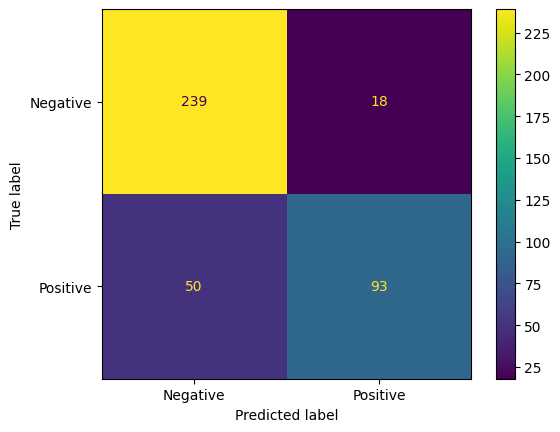

In [38]:
from sklearn import metrics

import matplotlib.pyplot as plt

cm=metrics.confusion_matrix(actual,predicted)

cm_display=metrics.ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=['Negative','Positive'])

cm_display.plot()